# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import LandingTask

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = LandingTask(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

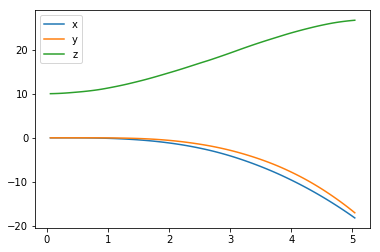

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

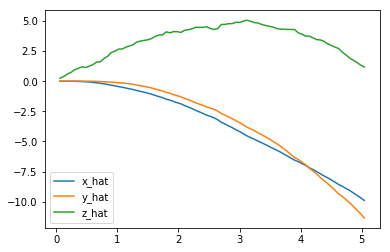

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

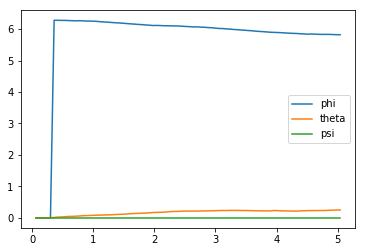

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

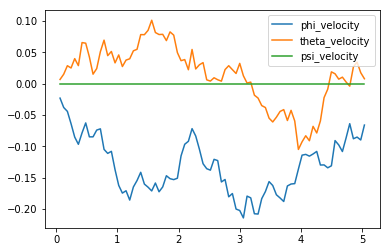

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

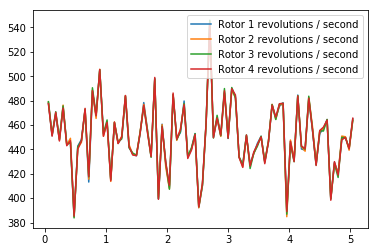

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-18.159895   -16.99438289  26.65582761   5.82116694   0.25218632   0.        ]
[ -9.88757895 -11.33659371   1.17348798]
[-0.0660814   0.00775837  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import LandingTask

num_episodes = 1000
init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 0.]) # landing
task = LandingTask(init_pose=init_pose, target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   1.516 (best =   2.741), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
# import necessary libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [11]:
# this function is to visualize best flight trajectory of the flights
# initial position is the beginning of the  best_flightPath
# targetPosition
def plot_bestFlight(best_flightPath, targetPosition):
    mpl.rcParams['legend.fontsize'] = 10
    
    # initial path
    init_pos = best_flightPath[0][0:3] 
    print('Initial Position')
    print(init_pos)
    
    # end path
    end_pos = best_flightPath[len(best_flightPath)-1][0:3]
    print('End Position')
    print(end_pos)
    
    # target position
    print('Target Position')
    print(targetPosition)
    
    # set the path trajectory from the 
    x_projection = np.zeros((len(best_flightPath), 1))
    y_projection = np.zeros((len(best_flightPath),1))
    z_projection = np.zeros((len(best_flightPath),1))
    for ii in range(len(best_flightPath)):
        x_projection[ii], y_projection[ii], z_projection[ii] = best_flightPath[ii][:3]
    
    print(z_projection[:, 0])
    # plot the results
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # initial position
    ax.plot(np.array([init_pos[0]]), np.array([init_pos[1]]), np.array([init_pos[2]]), 'bo', label='init_pos')
    # end position
    ax.plot(np.array([end_pos[0]]), np.array([end_pos[1]]), np.array([end_pos[2]]), 'ro', label='end_pos')
    # target position
    ax.plot(np.array([targetPosition[0]]), np.array([targetPosition[1]]), np.array([targetPosition[2]]), 'C1X', label='target_pos')
    # flight trajectory
    ax.plot(x_projection[:, 0], y_projection[:, 0], z_projection[:, 0], 'k', label='projection');
    ax.legend()

In [12]:
# This function is to visualize reward from best flight and average
def plot_rewardEvo(best_reward_evo, score_evo, performance):
    length_evo = len(best_reward_evo)
    length_score = len(score_evo)
    length_distance = len(performance)
    
    x_reward = np.linspace(1,  length_evo, num=length_evo)
    x_score = np.linspace(1, length_score, num=length_score)
    x_performance = np.linspace(1, length_distance, num=length_distance)
    
    # plot the evolution of the reward in the best performance
    fig = plt.figure()
    plt.plot(x_reward, best_reward_evo, label='reward_evo')
    plt.title("Reward Evolution in the best episode")
    plt.xlabel("Trial")
    fig = plt.figure()
    plt.plot(x_score, score_evo, label='score_evo')
    plt.title("Evolution of the Score in all episodes")
    plt.xlabel("Trial")
    fig = plt.figure()
    plt.plot( x_performance, performance, label='perfo')
    plt.title("Evolution of distance at the end time in all episodes")
    plt.xlabel("Trial")
    

In [13]:
## TODO: Train your agent here.
# import DDPG algorithms to train DDPG agent
from agents.agent import ReplayBuffer, Actor, Critic,  DDPG, OUNoise
from collections import namedtuple, deque
from task import LandingTask
import numpy as np
import sys

num_episodes =500
runtime = 5.                                     # time limit of the episode
target_pos = np.array([0., 0., 0.])
init_pose = np.array([0., 0., 10., 0., 0., 0.])
task = LandingTask(init_pose=init_pose, runtime=runtime, target_pos=target_pos)
# define Deep Deterministic Policy Gradients
agent = DDPG(task) 

reward_evo = np.zeros((num_episodes+1, 1));

# get the best flight path
best_reward_evo = [];
best_flight_path = [];
worst_flight_path = [];
score_evo = []
performance_results = [];

best_distance = 100;
worst_distance = 0;

for i_episode in range(1, num_episodes+1):
    # start a new episode
    state = agent.reset_episode()
    
    # set the initial position
    flight_path = [state]
    # set the initial reward
    reward_evo = []
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
        flight_path.append(state)
        reward_evo.append(reward)
        
        if done:
            score_evo.append(agent.score)
            distance = np.linalg.norm(state[:3]- target_pos)
            performance_results.append(distance)
            print("\rEpisode = {:4d}, distance= {:7.3f}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, distance, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            if best_distance >  distance:
                best_flight_path = flight_path
                best_reward_evo = reward_evo
                best_distance = distance
            print(", Best={:7.3f}".format(best_distance), end="")
            if worst_distance < distance:
                worst_flight_path = flight_path
                worst_distance = distance
            break
    sys.stdout.flush()

Using TensorFlow backend.


Episode =  500, distance=   0.777, score =   0.337 (best =   6.000), noise_scale = 3.2, Best=  0.02296

The best flight
Initial Position
[  0.   0.  10.]
End Position
[ 0.02218327 -0.00202919  0.        ]
Target Position
[ 0.  0.  0.]
[ 10.           9.99803924   9.96861806   9.90380982   9.80341002
   9.66708902   9.49438757   9.28471001   9.03731601   8.75130993
   8.42562703   8.05901784   7.65002798   7.19697483   6.69792189
   6.15065488   5.55266632   4.90122396   4.19467431   3.43836143
   2.65058693   1.81130337   0.90419123   0.        ]
The last flight
Initial Position
[  0.   0.  10.]
End Position
[ -6.47906752e-01  -3.14650496e-05   4.28737481e-01]
Target Position
[ 0.  0.  0.]
[ 10.          10.00047282   9.97159791   9.89740731   9.79204228
   9.65953823   9.48256854   9.29260548   9.0971867    8.89313022
   8.63187961   8.31495565   7.98887963   7.63885459   7.22462204
   6.77178053   6.31102824   5.80958345   5.24768703   4.6611658
   4.05896017   3.40589568   2.70201746   1.97899253   1.23009442
   0.42873748]
The worst flight
Initial Position
[  0.   0.  10.]
End Positi

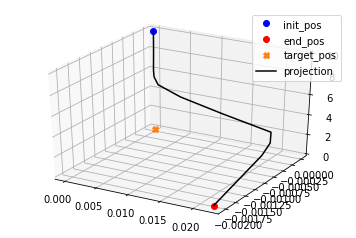

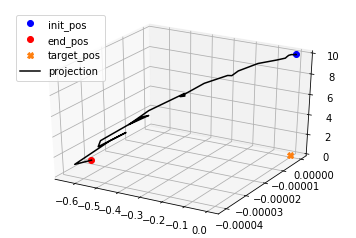

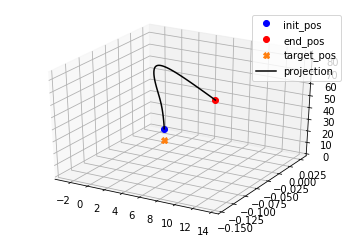

In [14]:
# plot the projection of the best score
print('The best flight')
plot_bestFlight(best_flight_path, target_pos)
print('The last flight')
plot_bestFlight(flight_path, target_pos)
print('The worst flight')
plot_bestFlight(worst_flight_path, target_pos)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

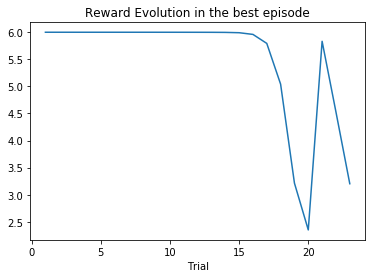

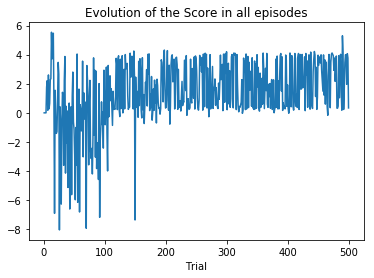

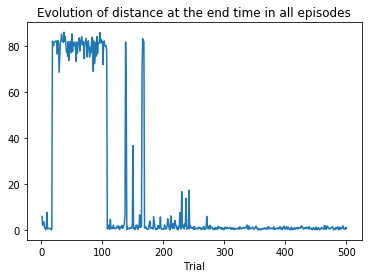

In [15]:
# plot evolution of returns in the best score case
plot_rewardEvo(np.array(best_reward_evo), np.array(score_evo), performance_results)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

***Task:***
The task for my case is about landing. Initial position is [0, 0, 10], and let a quadcopeter land on the target position [0, 0, 0] (landing task).

***How I did set the reward function.***
I tried to set the reward function to guide a quadcopter toward the target position by penalizing 
- the quadcopter moves to far away from the target (distance)
- the quadcopter moves toward x or y axis (orientation)
Further rewarding by 
- the quadcopeter stays closer at late time



**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

***What learning algorithm(s) did you try? What worked best for you? ***
- In this case, I used Deep Deterministic Policy Gradients (DDPG) algorithm, which is a continuous model of deep reinforcement learning.

***What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)? ***
The final choice of the hyperparameters is as shown below.
- $\alpha = 0.0001$, $\gamma=0.99$, $\epsilon=0.0001$

***What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.***
I used DDPG.
- Actor module has three hidden layers (32, 64, 128 units) with relu function, and output layer with sigmoid function.
- Critic module 
    - state module has two hidden layers (32, 64 units) with relu function
    - action module has two hidden layers (32, 64 units) with relu function
    - combined module has one hidden layer (32 unit) with relu function

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
***Was it an easy task to learn or hard?***

It was very hard for me to let the agent learn the landing task.
Setting the reward function and how to see the best performance are the most difficult part, and I could not properly set it.

***Was there a gradual learning curve, or an aha moment?***

Based on the plot, it is more like aha moment when the reward result was stabilized.
However, the total reward is not improving in terms of highest rewards

***How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)***

In my result, performance of the agent evaluated by the total returns and the distance between the last position of the agent and the target position.
My results showed mean of the ending score (last 50 episodes) showed higher score than the beginning score (first 50 episode).

In [16]:
# reward
print('First 50 mean reward =', np.mean(score_evo[:50]))
print('Mid 50 mean reward =', np.mean(score_evo[200:250]))
print('Last 50 mean reward =', np.mean(score_evo[450:]))
print('')
# performance with the final distance
print('First 50 mean distance =', np.mean(performance_results[:50]))
print('Mid 50 mean distance =', np.mean(performance_results[200:250]))
print('Last 50 mean distance =', np.mean(performance_results[450:]))

First 50 mean reward = -0.137262002995
Mid 50 mean reward = 1.83526543088
Last 50 mean reward = 2.6936476944

First 50 mean distance = 53.7832225683
Mid 50 mean distance = 2.38841290356
Last 50 mean distance = 0.772107723791


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
***What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)***
- Challenging order of the task for me is a following order. (setting an appropriate reward function, specifying the task, setting prpoer parameters, plotting, getting started). Setting an appropriate reward function was the hardest problem in this project. It required multiple trial and error. I suppose that the setting a proper reward function might be the most important factor to control an agent.
- Another difficulty of the project is that it was hard to determine the problem came from parameter settings of network architecture or a reward function.

***Did you find anything interesting in how the quadcopter or your agent behaved?***
- I guess the end timing of each episode is landing on the ground. Therefore, the quadcopeter tries to land as soon as possible.
- It was hard to penalize early landing behaviors.